In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import string 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
df_true = pd.read_csv("True.csv") 
df_fake = pd.read_csv("Fake.csv")

In [3]:
df_fake.tail(10)

,title,text,subject,date
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016"
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016"
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016"
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016"
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016"
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [4]:
df_true["target"] = 1
df_fake["target"] = 0

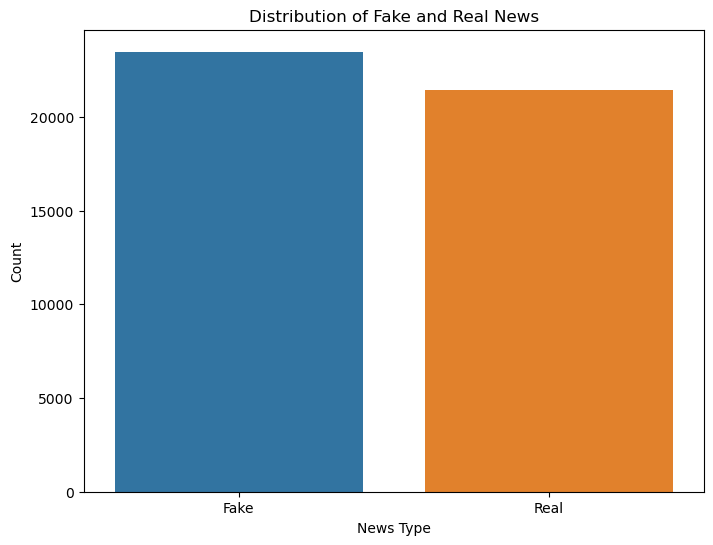

In [5]:
plt.figure(figsize=(8, 6))
sn.countplot(x='target', data=pd.concat([df_fake, df_true]))
plt.title('Distribution of Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_true_testing = df_true.tail(20)
for i in range(21416, 21396, -1):
    df_true.drop([i], axis = 0, inplace = True)
    
df_fake_testing = df_fake.tail(20)
for i in range(23480,23460, -1):
    df_fake.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23461, 5), (21397, 5))

In [9]:
df_fake_testing = df_fake_testing.copy()
df_true_testing = df_true_testing.copy()

df_fake_testing['target'] = 0
df_true_testing['target'] = 1

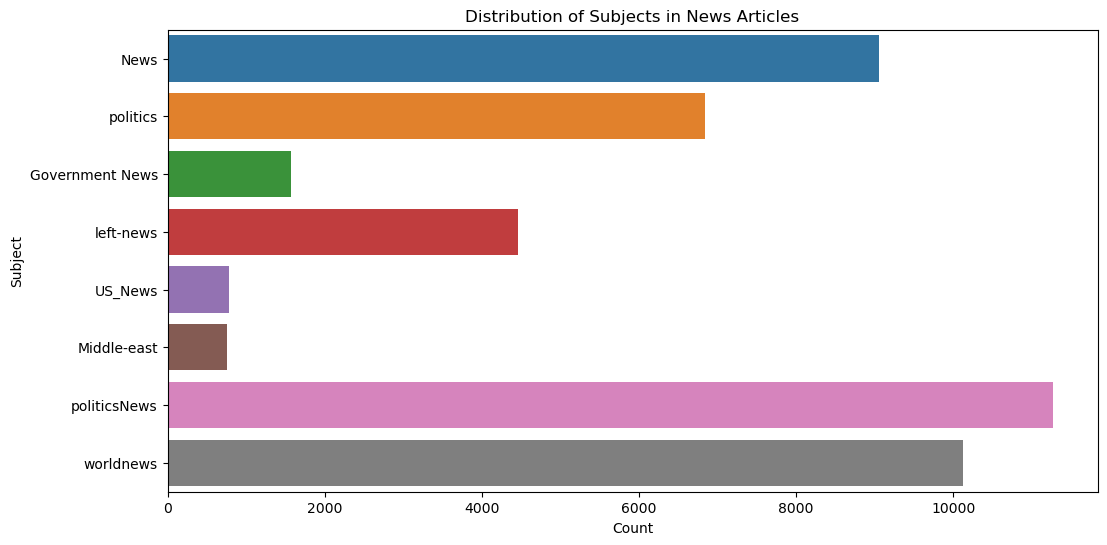

In [10]:
plt.figure(figsize=(12, 6))
sn.countplot(y='subject', data=pd.concat([df_fake, df_true]))
plt.title('Distribution of Subjects in News Articles')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

In [11]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

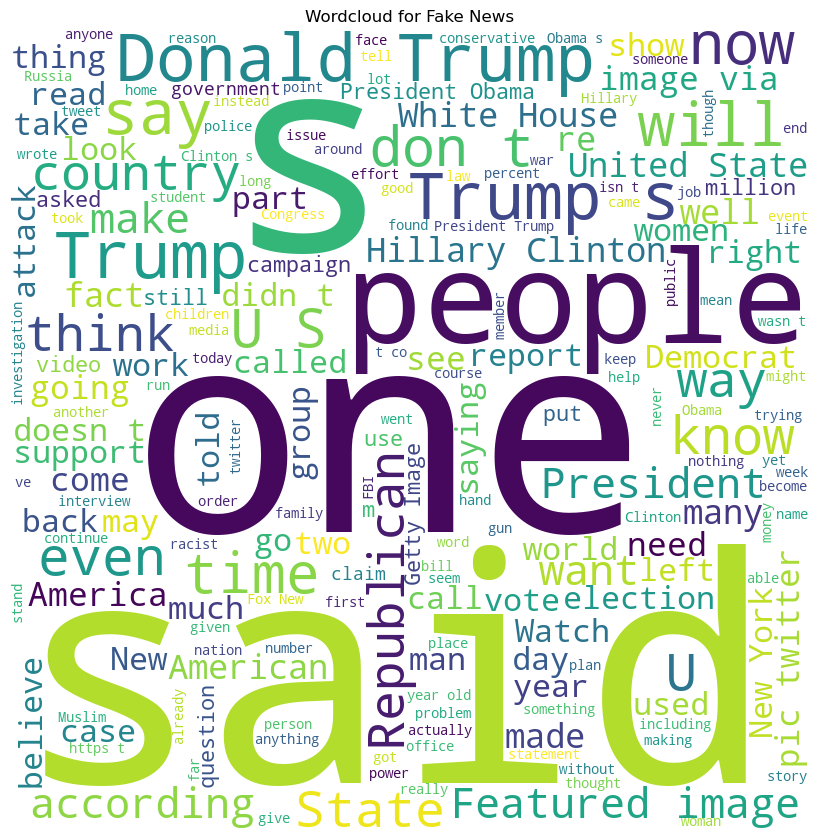

In [13]:
fake_text = ' '.join(df_fake['text'])
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(STOPWORDS), 
                      min_font_size = 10).generate(fake_text)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Wordcloud for Fake News')
plt.show()


In [14]:
data = df_marge.drop(['title', 'subject', 'date'], axis = 1)

In [15]:
data = data.sample(frac = 0.5)

In [16]:
data.isnull().sum()

text      0
target    0
dtype: int64

In [17]:
data.tail(10)

,text,target
1937,Former National Security Adviser Michael Flynn...,0
1200,WASHINGTON (Reuters) - The U.S. Federal Commun...,1
15903,TEHRAN (Reuters) - Iranian Supreme Leader Ayat...,1
20554,ABUJA (Reuters) - Nigeria s President Muhammad...,1
2706,"MONTEREY, Calif. (Reuters) - The California Pu...",1
17338,LONDON (Reuters) - The probability that Britai...,1
11033,Tim Poole is citizen journalist who s done som...,0
19252,https://www.youtube.com/watch?v=IPqrimR8GWw,0
9595,"Liberalism is truly a mental disorder. Sadly, ...",0
18365,KIGALI (Reuters) - Rwandan authorities have ch...,1


In [18]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [19]:
data.head()

,text,target
0,WASHINGTON (Reuters) - The U.S. House of Repre...,1
1,21st Century Wire says President Donald J. Tru...,0
2,Brigitte Macron is 24 years older than her hus...,0
3,"What next? Under a Sacramento, California prog...",0
4,WASHINGTON (Reuters) - Highlights of the day f...,1


In [20]:
data.columns

Index(['text', 'target'], dtype='object')

In [21]:
import re
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [22]:
def pro(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\\W', ' ', text)  
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>+', '', text)  
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'w*\d\w*', '', text)
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

In [23]:
data['text'] = data['text'].apply(pro)

In [24]:
x = data['text']
y = data['target']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
vec_train = vectorization.fit_transform(x_train) #xv train
vec_test = vectorization.transform(x_test)


In [27]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(vec_train, y_train)

LogisticRegression()

In [28]:
pred_lr = lor.predict(vec_test)

In [29]:
lor.score(vec_test, y_test)

0.9805634807417974

In [30]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2925
           1       0.98      0.98      0.98      2683

    accuracy                           0.98      5608
   macro avg       0.98      0.98      0.98      5608
weighted avg       0.98      0.98      0.98      5608



In [31]:
print(y_test.shape, pred_lr.shape)


(5608,) (5608,)


In [32]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(vec_train, y_train)

DecisionTreeClassifier()

In [33]:
pred_dt = DT.predict(vec_test)

In [34]:
DT.score(vec_test, y_test)

0.9935805991440799

In [35]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2925
           1       0.99      0.99      0.99      2683

    accuracy                           0.99      5608
   macro avg       0.99      0.99      0.99      5608
weighted avg       0.99      0.99      0.99      5608



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(vec_test, y_test) 

GradientBoostingClassifier(random_state=0)

In [37]:
pred_gb = GB. predict(vec_test)

In [38]:
GB.score(vec_test, y_test)

0.9998216833095578

In [39]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2925
           1       1.00      1.00      1.00      2683

    accuracy                           1.00      5608
   macro avg       1.00      1.00      1.00      5608
weighted avg       1.00      1.00      1.00      5608



In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(vec_train,y_train)

RandomForestClassifier(random_state=0)

In [41]:
pred_rf = RF.predict(vec_test)

In [42]:
RF.score(vec_test, y_test)

0.9876961483594865

In [43]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2925
           1       0.98      0.99      0.99      2683

    accuracy                           0.99      5608
   macro avg       0.99      0.99      0.99      5608
weighted avg       0.99      0.99      0.99      5608



In [44]:
def out(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def testing(news):
    testing = {"text" : [news]}
    new_test = pd.DataFrame(testing)
    new_test["test"] = new_test["text"].apply(pro) 
    x_test = new_test["test"]
    vec_test = vectorization.transform(x_test)
    pred_LR = lor.predict(vec_test)
    pred_DT = DT.predict(vec_test)
    pred_GBC = GB.predict(vec_test)
    pred_RFC = RF.predict(vec_test)
    
    return print("\nRFC Prediction : {}\nGBC Prediction : {}\nDT Prediction : {}\nLR Predicton : {}".format(out(pred_RFC[0]), out(pred_GBC[0]), out(pred_DT[0]), out(pred_LR[0])))


In [45]:
news = str(input())
testing(news)

The pizza shop, called Comet Ping Pong, had become embroiled in a strange situation due to an event that had occurred about one month earlier. There were false tweets widely spread on the net claiming that this pizza shop was the base for a pedophile sex ring involving Democratic presidential candidate Hillary Clinton, a former Secretary of State, and members of her campaign. The operators of the pizza shop began receiving threats from right wing activists who believed that the reports were true.

RFC Prediction : Fake News
GBC Prediction : Fake News
DT Prediction : Fake News
LR Predicton : Fake News
